<a href="https://colab.research.google.com/github/ishara-bangkit-capstone-project/ishara-machine-learning/blob/main/Copy_of_ISHARA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Data from Kaggle to further processing it

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import files
files.upload()

KeyboardInterrupt: 

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download -d agungmrf/indonesian-sign-language-bisindo

Dataset URL: https://www.kaggle.com/datasets/agungmrf/indonesian-sign-language-bisindo
License(s): unknown
indonesian-sign-language-bisindo.zip: Skipping, found more recently modified local copy (use --force to force download)


#Importing the necessary Library


In [ ]:
#Importing the necessary Library
import tensorflow as tf
import zipfile,os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Exctracting the Picture Data from kaggle


In [ ]:
import os
import zipfile

# Tentukan nama file ZIP dan direktori ekstraksi
local_zip = '/content/indonesian-sign-language-bisindo.zip'
extract_dir = '/content/bisindo'

# Ekstrak file ZIP
with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


In [ ]:
import shutil
shutil.rmtree('/content/bisindo/bisindo/labels/')

In [ ]:
#Unpacking the the extracting data and putting it in list
data_dir = '/content/bisindo'

images = []
labels = []
label = []
for path, subdirs, files in os.walk(data_dir):
    for name in files:
        label.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        images.append(name)

#Using DataFrame Object to Preprocessing the data from list to Tabular Data Format


In [ ]:
#Using DataFrame Object to Preprocessing the data from list to Tabular Data Format
df = pd.DataFrame({"path":label,'file_name':images,"tag":labels})
df

,path,file_name,tag
0,/content/bisindo/bisindo/images/train/W/flip02...,flip022.jpg,W
1,/content/bisindo/bisindo/images/train/W/flip12...,flip126.jpg,W
2,/content/bisindo/bisindo/images/train/W/rotate...,rotate094.jpg,W
3,/content/bisindo/bisindo/images/train/W/image_...,image_29.jpg,W
4,/content/bisindo/bisindo/images/train/W/augmen...,augmented_image_26.jpg,W
...,...,...,...
11465,/content/bisindo/bisindo/images/val/J/augmente...,augmented_image_36.jpg,J
11466,/content/bisindo/bisindo/images/val/J/rotate03...,rotate035.jpg,J
11467,/content/bisindo/bisindo/images/val/J/augmente...,augmented_image_79.jpg,J
11468,/content/bisindo/bisindo/images/val/J/rotate13...,rotate135.jpg,J


In [ ]:
#Checking the Distribution of Data from Tag
df.groupby(['tag']).size()

tag
A    438
B    439
C    429
D    435
E    441
F    447
G    450
H    435
I    450
J    450
K    435
L    447
M    444
N    438
O    447
P    447
Q    435
R    438
S    429
T    450
U    444
V    447
W    450
X    444
Y    411
Z    450
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11470 entries, 0 to 11469
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   path       11470 non-null  object
 1   file_name  11470 non-null  object
 2   tag        11470 non-null  object
dtypes: object(3)
memory usage: 269.0+ KB


In [ ]:
import cv2

# Cek konsistensi file gambar
valid_images = []
for idx, row in df.iterrows():
    img_path = row['path']
    img = cv2.imread(img_path)
    if img is not None:
        valid_images.append(idx)
    else:
        print(f"File gambar tidak valid: {img_path}")

# Hanya gunakan gambar yang valid
df = df.iloc[valid_images]



In [ ]:
# Tentukan ukuran gambar yang diinginkan
width = 100
height = 100

# Resize gambar
resized_images = [cv2.resize(cv2.imread(img_path), (width, height)) for img_path in df['path']]


In [ ]:
# Normalisasi
normalized_images = [img / 255.0 for img in resized_images]

In [ ]:
df

,path,file_name,tag
0,/content/bisindo/bisindo/images/train/W/flip02...,flip022.jpg,W
1,/content/bisindo/bisindo/images/train/W/flip12...,flip126.jpg,W
2,/content/bisindo/bisindo/images/train/W/rotate...,rotate094.jpg,W
3,/content/bisindo/bisindo/images/train/W/image_...,image_29.jpg,W
4,/content/bisindo/bisindo/images/train/W/augmen...,augmented_image_26.jpg,W
...,...,...,...
11465,/content/bisindo/bisindo/images/val/J/augmente...,augmented_image_36.jpg,J
11466,/content/bisindo/bisindo/images/val/J/rotate03...,rotate035.jpg,J
11467,/content/bisindo/bisindo/images/val/J/augmente...,augmented_image_79.jpg,J
11468,/content/bisindo/bisindo/images/val/J/rotate13...,rotate135.jpg,J


# Splitting the data Training, Validation, Test Data

In [ ]:
X= df['path']
y= df['tag']

# Split dataset to become training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=300)

 #Test dataset divided equally
X_test, X_val, y_test, y_val_a= train_test_split(
    X_test, y_test, test_size=0.5, random_state=100)

In [ ]:
#Checking the result of Splitting data
df_train = pd.DataFrame({'path':X_train
              ,'tag':y_train
             ,'set':'train'})

df_test = pd.DataFrame({'path':X_test
              ,'tag':y_test
             ,'set':'test'})

df_val = pd.DataFrame({'path':X_val
              ,'tag':y_val_a
             ,'set':'validation'})

print('train size', len(df_train))
print('val size', len(df_test))
print('test size', len(df_val))

train size 8029
val size 1720
test size 1721


In [ ]:
import pandas as pd

# Gabungkan DataFrame df_train, df_test, dan df_val menjadi df_all
df_all = pd.concat([df_train, df_test, df_val]).reset_index(drop=True)

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')

# Cek sampel data
df_all.sample(3)



set         tag
test        A      71
            B      57
            C      68
            D      61
            E      65
                   ..
validation  V      89
            W      71
            X      64
            Y      48
            Z      72
Length: 78, dtype: int64 




,path,tag,set
3400,/content/bisindo/bisindo/images/train/H/rotate...,H,train
4523,/content/bisindo/bisindo/images/train/V/augmen...,V,train
1548,/content/bisindo/bisindo/images/train/F/rotate...,F,train


#Creating the Folder Dataset for Training, Validation, Test Data

In [ ]:
import shutil
from tqdm.notebook import tqdm as tq

dataset_path = "content/dataset/"
for index, row in tq(df_all.iterrows()):

    #detect filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(data_dir,row['tag'],row['image'].split('.')[0])

    #make folder destination dirs
    if os.path.exists(os.path.join(data_dir,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(data_dir,row['set'],row['tag']))

    #define file dest
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(data_dir,row['set'],row['tag'],destination_file_name)

    #copy file from source to dest
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

0it [00:00, ?it/s]

# TRAINING

## Using Transfer Learning Method, MobileNetV2 and fine-tuning it

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

train_data_dir = '/content/bisindo/train'
validation_data_dir = '/content/bisindo/validation'
test_data_dir = '/content/bisindo/test'

# Load MobileNetV2 without the top classification layer
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze the layers of MobileNetV2
for layer in base_model.layers:
    layer.trainable = False

batch_size = 512
# Adjust the number of classes based on your dataset
num_classes = 26

# Add custom layers on top of MobileNetV2
modelmn2 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Adjust to the correct number of classes
])

# Compile the model
modelmn2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
modelmn2.summary()

# Define data generators
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   rotation_range=25,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Loading data with tensorflow
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Training parameters
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size
epochs = 10

# Train the model
history = modelmn2.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=validation_steps
)


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
 0 (GlobalAveragePooling2D)                                      
                                                                 
 dense_20 (Dense)            (None, 1024)              1311744   
                                                                 
 dropout_10 (Dropout)        (None, 1024)              0         
                                                                 
 dense_21 (Dense)            (None, 26)                26650     
                                                                 
Total params: 3596378 (13.72 MB)
Trainable params: 13

# Checking the Loss and Accuracy visualization of the resulted Training

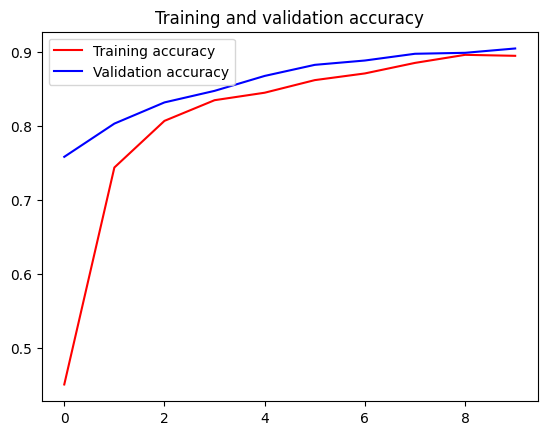

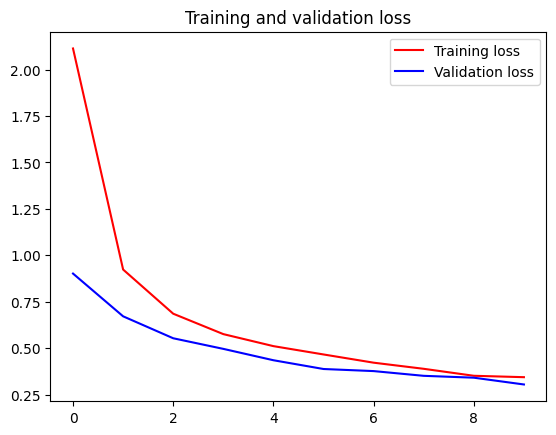

In [ ]:
history = modelmn2.history

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.savefig('MobileVnet2-percobaan_accuracy3.png')
plt.figure()


plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.savefig('MobileVnet2-percobaan_loss3.png')
plt.show()


In [ ]:
loss, acc = modelmn2.evaluate(train_generator,steps=len(train_generator),verbose=0)
print('Accuracy on training data: {:.4f} \nLoss on training data: {:.4f}'.format(acc,loss),'\n')

loss, acc = modelmn2.evaluate(test_generator,steps=len(test_generator),verbose=0)
print('Accuracy on test data: {:.4f} \nLoss on test data: {:.4f}'.format(acc,loss),'\n')

Accuracy on training data: 0.9332 
Loss on training data: 0.2491 

Accuracy on test data: 0.9355 
Loss on test data: 0.2311 



In [ ]:
# Evaluate the model
test_loss, test_acc = modelmn2.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test accuracy: {test_acc}')

3/3 [==============================] - 9s 3s/step - loss: 0.2445 - accuracy: 0.9310
Test accuracy: 0.9309895634651184


#Saving the data

In [ ]:
MODEL_BASE_PATH = "model"
PROJECT_NAME = "medium_project"
SAVE_MODEL_NAME = "model-percobaan3-MobileNetV2.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)
if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))

print('Saving Model At {}...'.format(save_model_path))
modelmn2.save(save_model_path,include_optimizer=False)

Saving Model At model/medium_project/model-percobaan3-MobileNetV2.h5...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
